In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
df=pd.read_csv("data/sorted_data.csv").iloc[:,1:]

In [3]:
df

,DateTime,AQI-IN,AQI-US,PM25,PM10,PM1,AQI-IN(2),AQI-US(2),PM25(2),PM10(2),PM1(2),Temp(cel),Hum,Noise,Light
0,2019-11-12 00:00:00,668.76,499.96,541.09,645.17,227.84,816.00,500.00,595.00,763.00,270.00,19.66,62.00,42.39,48332.0
1,2019-11-12 01:00:00,672.40,500.00,548.99,648.20,233.32,852.99,500.00,610.07,792.48,279.21,19.74,62.92,41.83,48332.0
2,2019-11-12 02:00:00,696.34,500.00,567.10,667.22,237.52,882.38,500.00,628.13,815.98,287.19,20.00,63.18,46.24,48332.0
3,2019-11-12 03:00:00,754.72,500.00,602.54,714.00,242.85,898.00,500.00,675.00,829.00,295.00,18.35,65.89,40.05,48332.0
4,2019-11-12 04:00:00,884.74,500.00,662.52,818.20,251.60,898.00,500.00,675.00,829.00,295.00,18.14,66.43,39.55,48332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2020-02-09 19:00:00,379.22,272.65,223.41,251.66,132.72,302.00,185.00,123.00,142.00,76.00,18.04,66.07,46.18,48332.0
2156,2020-02-09 20:00:00,403.84,303.74,255.52,287.45,144.59,386.89,284.95,233.93,286.49,135.12,17.04,71.05,48.36,48332.0
2157,2020-02-09 21:00:00,414.45,315.31,269.58,312.97,144.94,403.00,304.00,255.00,315.00,146.00,16.68,74.01,49.36,48332.0
2158,2020-02-09 22:00:00,429.09,329.78,288.00,333.39,152.60,452.72,355.56,319.46,408.92,175.47,16.11,78.23,45.22,48332.0


In [4]:
def change_datetime(x):
    return datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [5]:
df["DateTime"]=df["DateTime"].apply(lambda x:change_datetime(x))

In [6]:
df.dtypes

DateTime     datetime64[ns]
AQI-IN              float64
AQI-US              float64
PM25                float64
PM10                float64
PM1                 float64
AQI-IN(2)           float64
AQI-US(2)           float64
PM25(2)             float64
PM10(2)             float64
PM1(2)              float64
Temp(cel)           float64
Hum                 float64
Noise               float64
Light               float64
dtype: object

# Plot

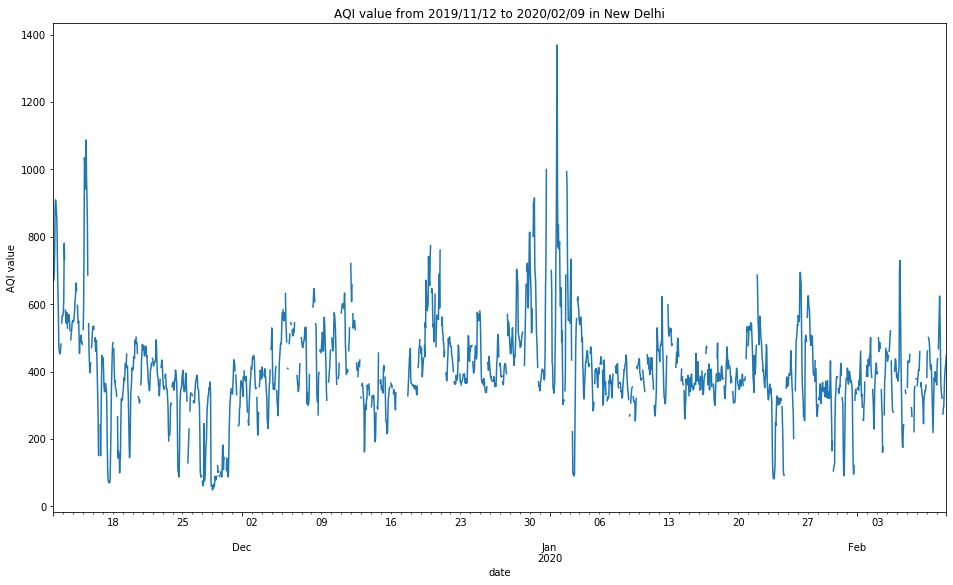

In [186]:
df.set_index('DateTime')["AQI-IN"].plot(figsize=(16,9))

plt.title("AQI value from 2019/11/12 to 2020/02/09 in New Delhi")
plt.xlabel("date")
plt.ylabel("AQI value")
plt.show()

Text(0, 0.5, 'AQI value')

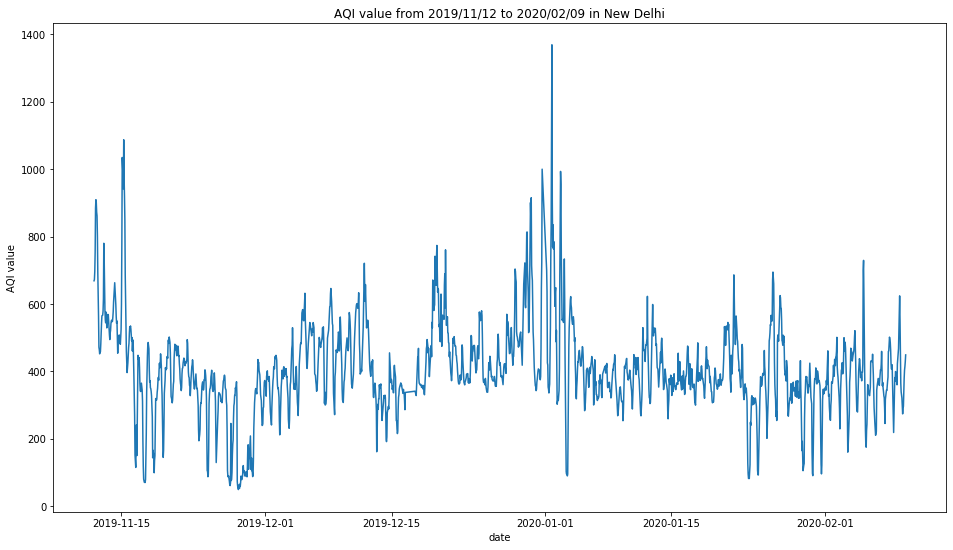

In [176]:
ts=df["AQI-IN"].interpolate('linear')
ts.index=df["DateTime"]

plt.figure(figsize=(16,9))
plt.plot(ts)
plt.title("AQI value from 2019/11/12 to 2020/02/09 in New Delhi")
plt.xlabel("date")
plt.ylabel("AQI value")

Text(0, 0.5, 'AQI value')

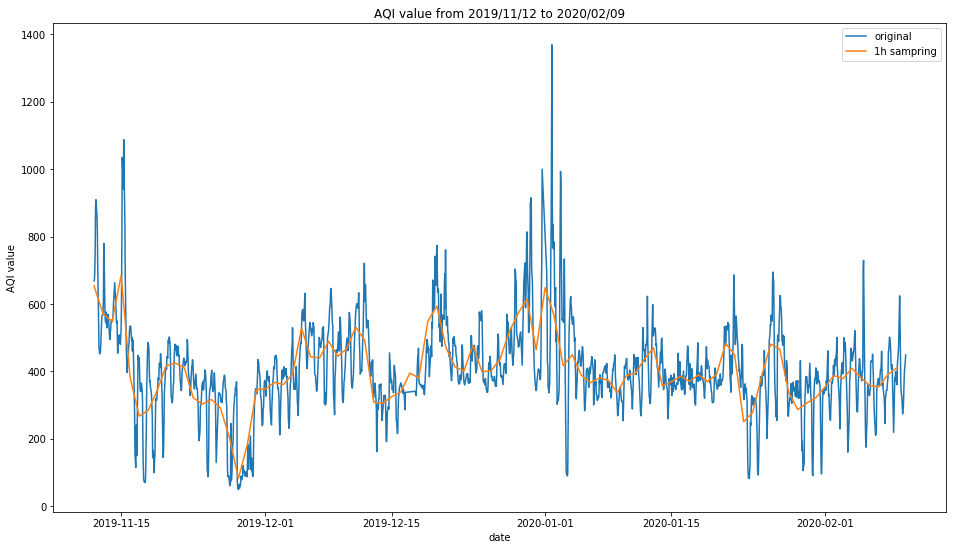

In [190]:
#1日ごとのサンプリング(平均値)
df_index=df.set_index('DateTime')
df_index_mean=df_index.resample("D").mean()

ts=df["AQI-IN"].interpolate('linear')
ts.index=df["DateTime"]

ts_mean=df_index_mean["AQI-IN"]
ts_mean.index=df_index_mean.index

plt.figure(figsize=(16,9))
plt.plot(ts, label="original")
plt.plot(ts_mean, label="1h sampring")
plt.title("AQI value from 2019/11/12 to 2020/02/09")
plt.legend()
plt.xlabel("date")
plt.ylabel("AQI value")

Text(0, 0.5, 'AQI value')

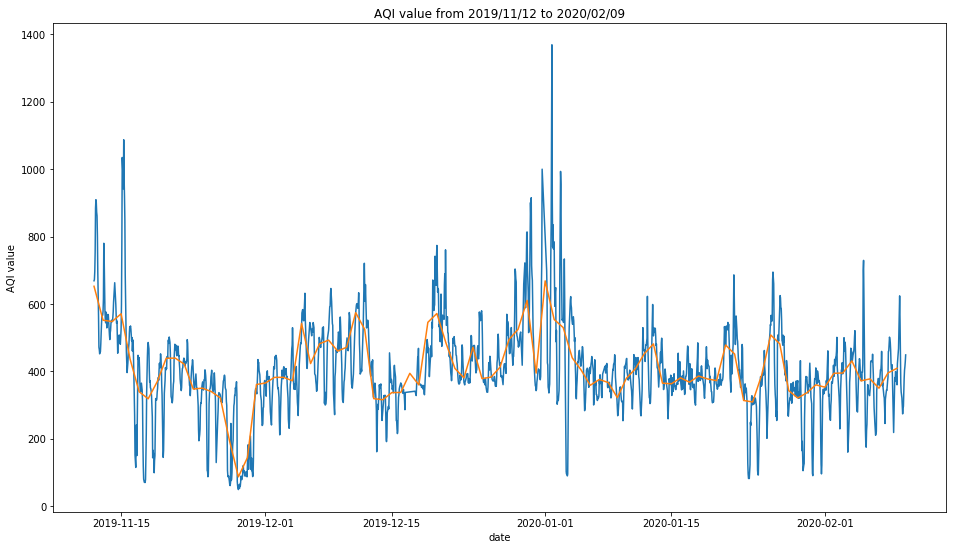

In [9]:
#1日ごとのサンプリング(中央値)
df_index=df.set_index('DateTime')
df_index_median=df_index.resample("D").median()

ts=df["AQI-IN"].interpolate('linear')
ts.index=df["DateTime"]

ts_median=df_index_median["AQI-IN"]
ts_median.index=df_index_median.index

plt.figure(figsize=(16,9))
plt.plot(ts)
plt.plot(ts_median)
plt.title("AQI value from 2019/11/12 to 2020/02/09")
plt.xlabel("date")
plt.ylabel("AQI value")

Text(0, 0.5, 'AQI value')

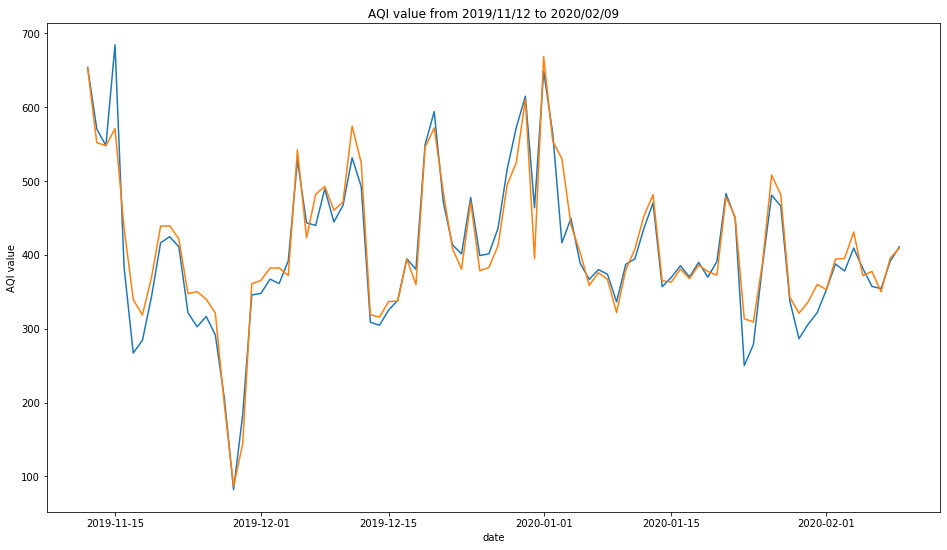

In [10]:
#平均と中央値の差
plt.figure(figsize=(16,9))
plt.plot(ts_mean)
plt.plot(ts_median)
plt.title("AQI value from 2019/11/12 to 2020/02/09")
plt.xlabel("date")
plt.ylabel("AQI value")

Text(0, 0.5, 'AQI value')

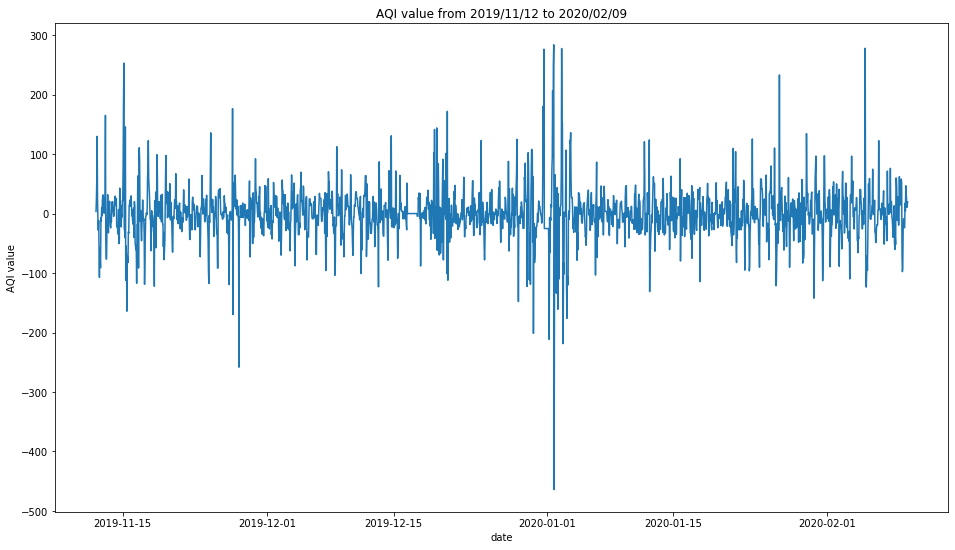

In [11]:
#差分
#->トレンド削除

plt.figure(figsize=(16,9))
plt.plot(ts.diff())
plt.title("AQI value from 2019/11/12 to 2020/02/09")
plt.xlabel("date")
plt.ylabel("AQI value")

Text(0, 0.5, 'AQI value')

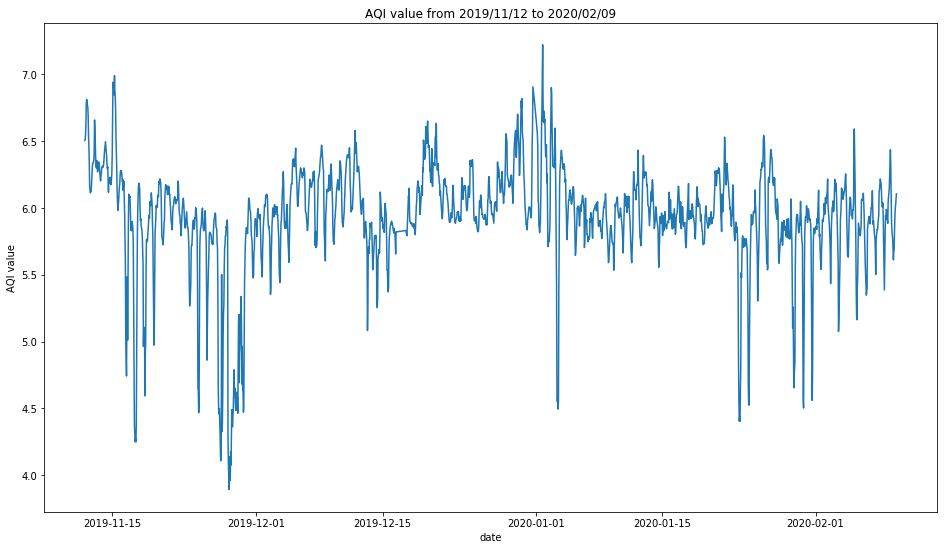

In [12]:
#log
plt.figure(figsize=(16,9))
plt.plot(np.log(ts))
plt.title("AQI value from 2019/11/12 to 2020/02/09")
plt.xlabel("date")
plt.ylabel("AQI value")

Text(0, 0.5, 'AQI value')

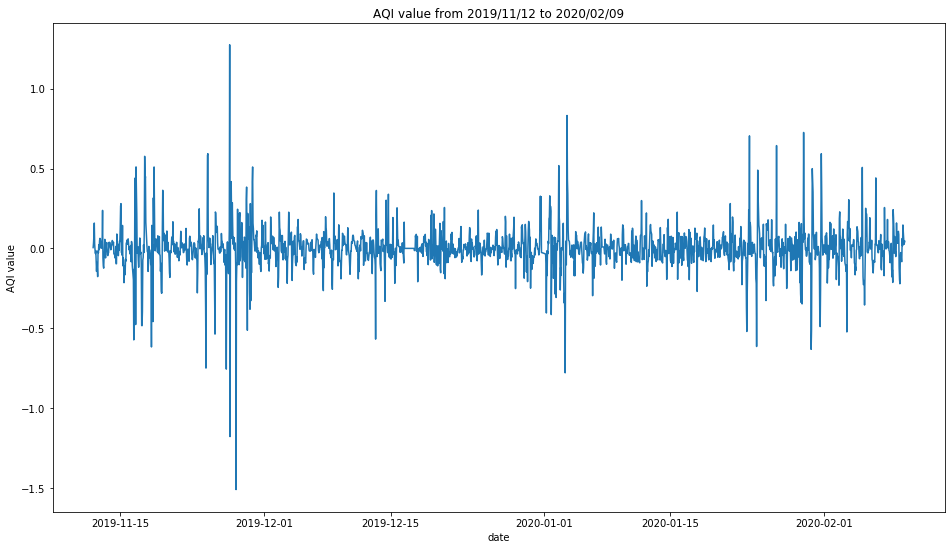

In [13]:
#log + 差分
plt.figure(figsize=(16,9))
plt.plot(np.log(ts).diff())
plt.title("AQI value from 2019/11/12 to 2020/02/09")
plt.xlabel("date")
plt.ylabel("AQI value")

### 考察  
- 定常性はありそう  
- 周期性?  
- 正値、上下非対称(y>0)

# ヒストグラム

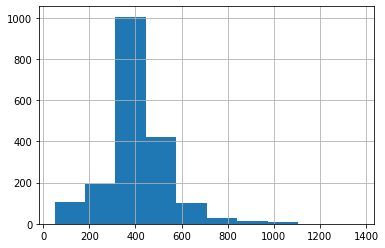

In [14]:
df["AQI-IN"].hist()

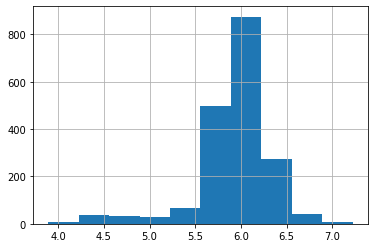

In [15]:
#対数変換
##⽬的 ・線形，定常，正規性などを仮定したモデリングを容易にするため ・パラメータ最適化を容易にするため
np.log(df["AQI-IN"]).hist()

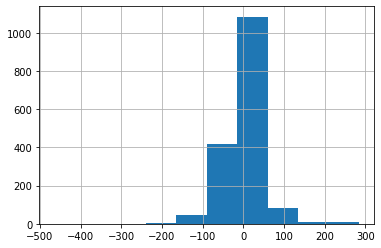

In [16]:
#一回差分
df["AQI-IN"].diff(1).dropna().hist()


# 自己相関plot

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


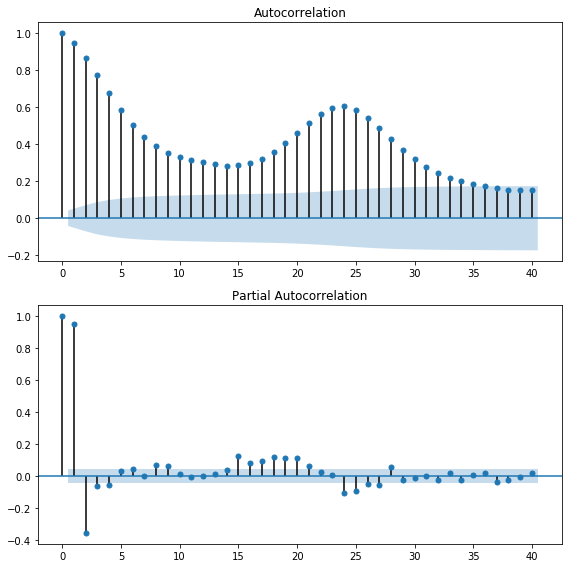

In [17]:
#自己相関係数の出力
ts_acf=sm.tsa.stattools.acf(ts.values, nlags=40)

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2) 

plt.tight_layout()

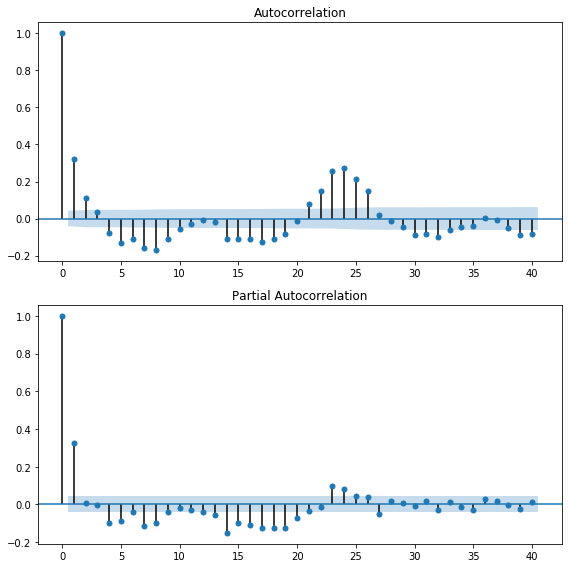

In [18]:
##一回階差の自己相関

fig = plt.figure(figsize=(8, 8))
# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts.diff().dropna() , lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts.diff().dropna(), lags=40, ax=ax2) 

plt.tight_layout()

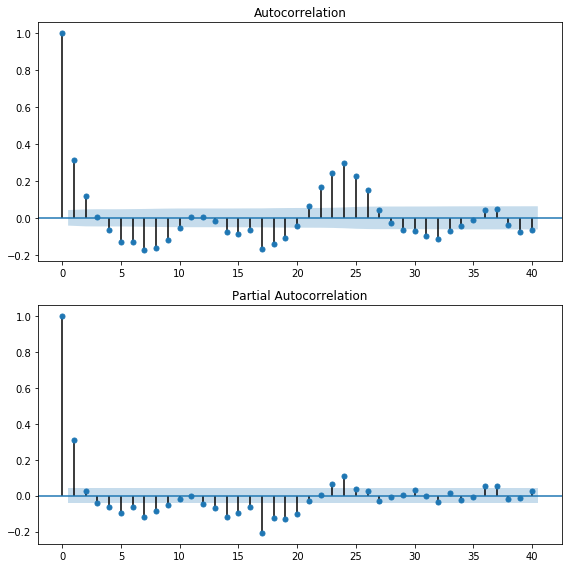

In [19]:
##対数変換の一回階差の自己相関

fig = plt.figure(figsize=(8, 8))
# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(np.log(ts).diff().dropna() , lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(np.log(ts).diff().dropna(), lags=40, ax=ax2) 

plt.tight_layout()

# 相関係数

In [20]:
df

,DateTime,AQI-IN,AQI-US,PM25,PM10,PM1,AQI-IN(2),AQI-US(2),PM25(2),PM10(2),PM1(2),Temp(cel),Hum,Noise,Light
0,2019-11-12 00:00:00,668.76,499.96,541.09,645.17,227.84,816.00,500.00,595.00,763.00,270.00,19.66,62.00,42.39,48332.0
1,2019-11-12 01:00:00,672.40,500.00,548.99,648.20,233.32,852.99,500.00,610.07,792.48,279.21,19.74,62.92,41.83,48332.0
2,2019-11-12 02:00:00,696.34,500.00,567.10,667.22,237.52,882.38,500.00,628.13,815.98,287.19,20.00,63.18,46.24,48332.0
3,2019-11-12 03:00:00,754.72,500.00,602.54,714.00,242.85,898.00,500.00,675.00,829.00,295.00,18.35,65.89,40.05,48332.0
4,2019-11-12 04:00:00,884.74,500.00,662.52,818.20,251.60,898.00,500.00,675.00,829.00,295.00,18.14,66.43,39.55,48332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2020-02-09 19:00:00,379.22,272.65,223.41,251.66,132.72,302.00,185.00,123.00,142.00,76.00,18.04,66.07,46.18,48332.0
2156,2020-02-09 20:00:00,403.84,303.74,255.52,287.45,144.59,386.89,284.95,233.93,286.49,135.12,17.04,71.05,48.36,48332.0
2157,2020-02-09 21:00:00,414.45,315.31,269.58,312.97,144.94,403.00,304.00,255.00,315.00,146.00,16.68,74.01,49.36,48332.0
2158,2020-02-09 22:00:00,429.09,329.78,288.00,333.39,152.60,452.72,355.56,319.46,408.92,175.47,16.11,78.23,45.22,48332.0


# 月ごとのPlot

<Figure size 1152x648 with 0 Axes>

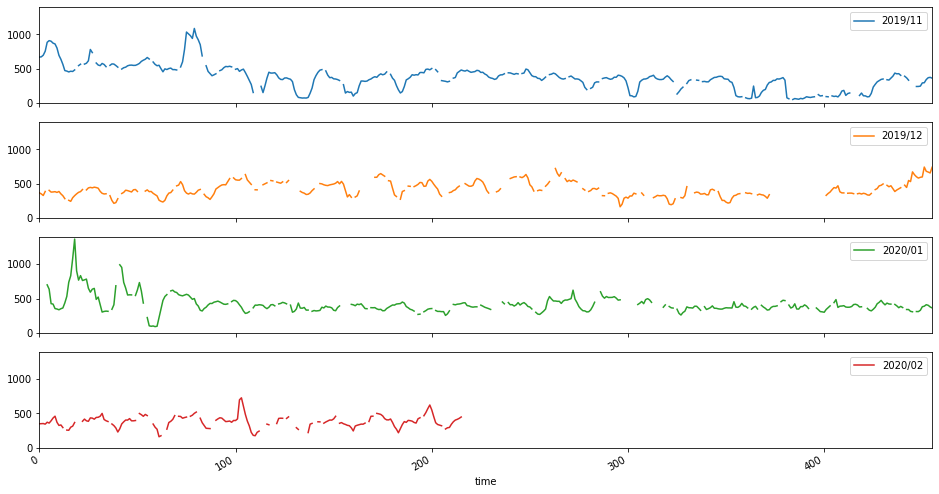

In [114]:
df_month=pd.DataFrame()
df_month["2019/11"]=df[(df["DateTime"]>="2019-11-01") & (df["DateTime"]<"2019-12-01")].reset_index()["AQI-IN"]
df_month["2019/12"]=df[(df["DateTime"]>="2019-12-01") & (df["DateTime"]<"2020-01-01")].reset_index()["AQI-IN"]
df_month["2020/01"]=df[(df["DateTime"]>="2020-01-01") & (df["DateTime"]<"2020-02-01")].reset_index()["AQI-IN"]
df_month["2020/02"]=df[(df["DateTime"]>="2020-02-01") & (df["DateTime"]<"2020-03-01")].reset_index()["AQI-IN"]

plt.figure(figsize=(16,9))
df_month.plot(subplots=True, legend=True, figsize=(16,9), ylim=(0,1400))
plt.xlabel("time")
plt.show()

<Figure size 1152x648 with 0 Axes>

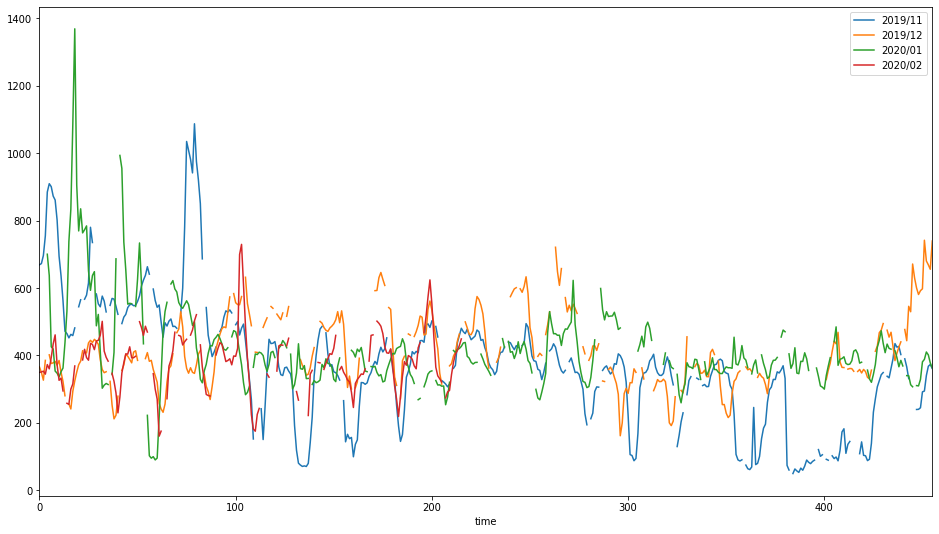

In [85]:
#同じスケールで比較
plt.figure(figsize=(16,9))
df_month.plot( legend=True, figsize=(16,9))
plt.xlabel("time")
plt.show()

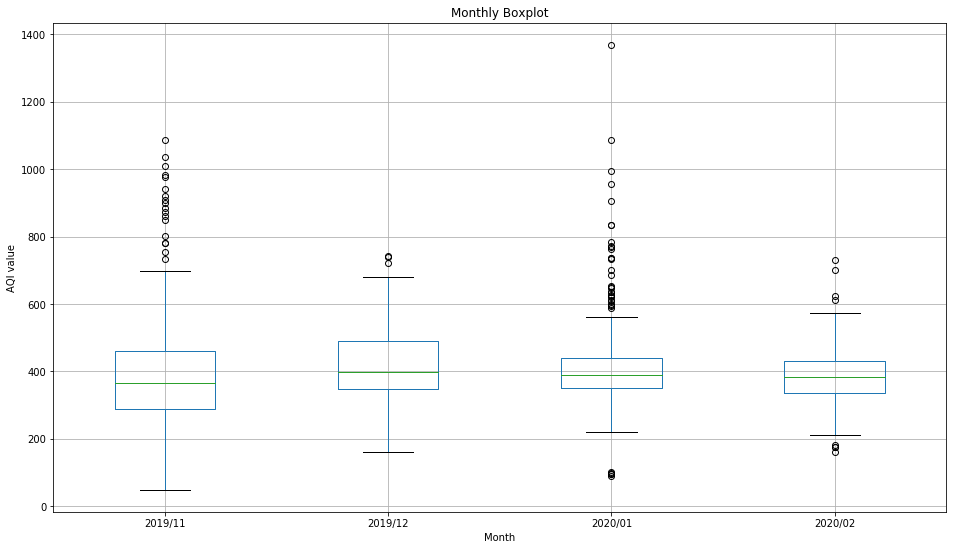

In [191]:
plt.figure(figsize=(16,9))
df_month.boxplot()
plt.xlabel("Month")
plt.title("Monthly Boxplot")
plt.ylabel("AQI value")
plt.show()

# 曜日ごとのPlot

In [130]:
df["weekday_name"]=df["DateTime"].dt.weekday_name

In [131]:
col=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [132]:
df_weekday=pd.DataFrame()
for name in col:
    df_weekday["{}".format(name)] = df[df["weekday_name"]=="{}".format(name)].reset_index()["AQI-IN"]

<Figure size 1152x648 with 0 Axes>

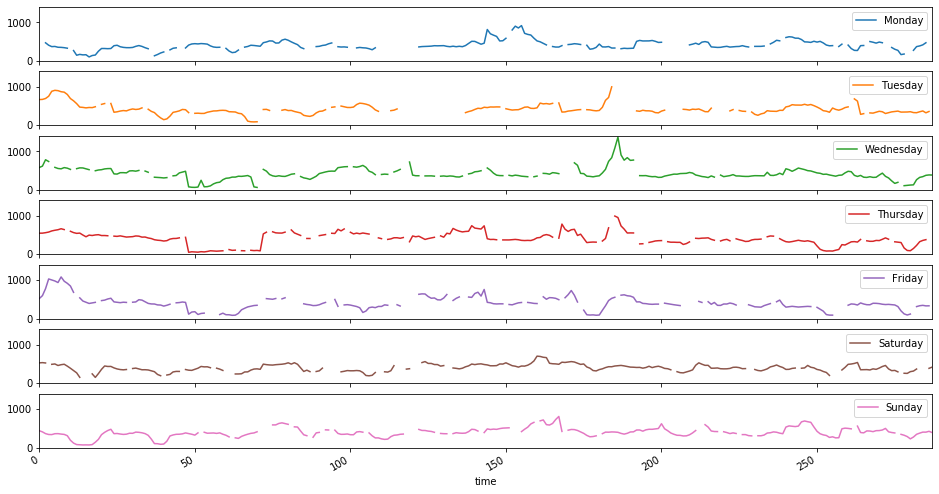

In [133]:
plt.figure(figsize=(16,9))
df_weekday.plot(subplots=True, legend=True, figsize=(16,9), ylim=(0,1400))
plt.xlabel("time")
plt.show()

<Figure size 1152x648 with 0 Axes>

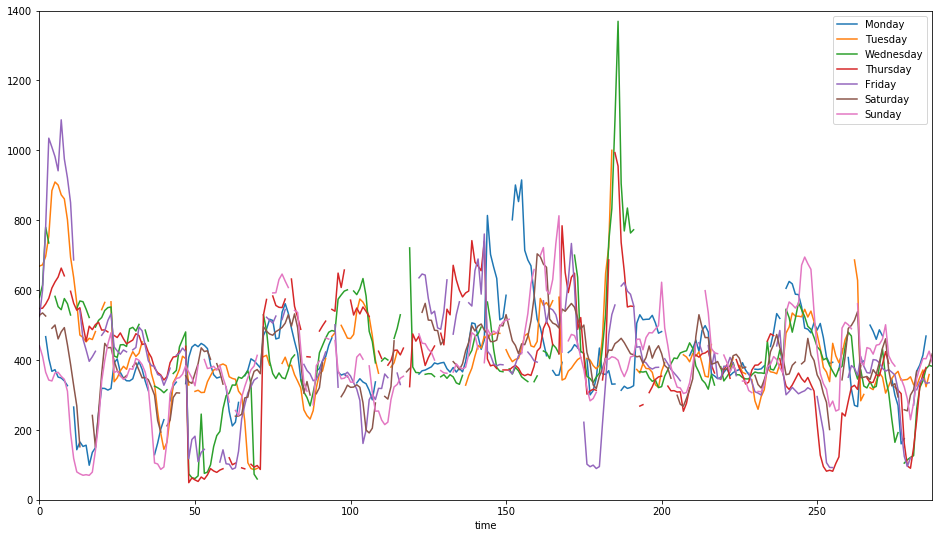

In [134]:
plt.figure(figsize=(16,9))
df_weekday.plot( legend=True, figsize=(16,9), ylim=(0,1400))
plt.xlabel("time")
plt.show()

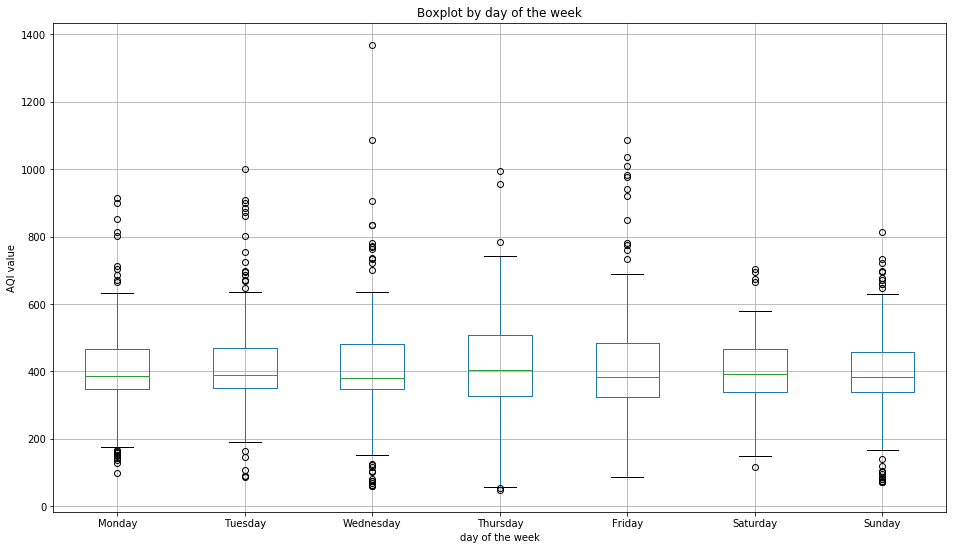

In [193]:
plt.figure(figsize=(16,9))
df_weekday.boxplot()
plt.title("Boxplot by day of the week")
plt.ylabel("AQI value")
plt.xlabel("day of the week")
plt.show()

# 時間ごとの平均

In [119]:
df["hour"]=df["DateTime"].dt.hour

In [126]:
df_hour=pd.DataFrame()
for name in df["hour"].unique():
    df_hour["{}".format(name)] = df[df["hour"]==name].reset_index()["AQI-IN"]

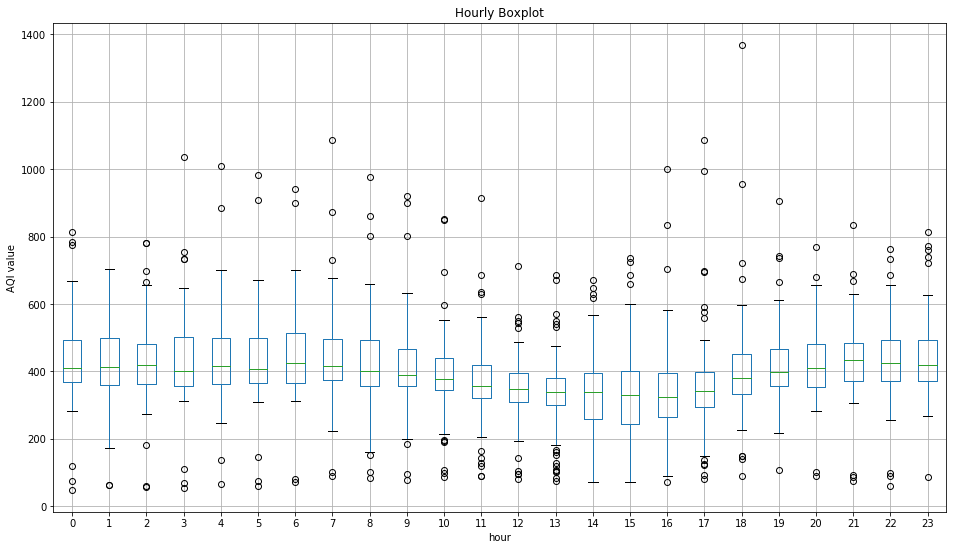

In [194]:
plt.figure(figsize=(16,9))
df_hour.boxplot()
plt.xlabel("hour")
plt.title("Hourly Boxplot")
plt.ylabel("AQI value")
plt.show()

# 時間×曜日のPlot

In [161]:
weekday_hour=df.groupby(["weekday_name", "hour"]).mean().reset_index()

In [162]:
col=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [163]:
df_weekday_hour=pd.DataFrame()
for name in col:
    df_weekday_hour["{}".format(name)]=weekday_hour[weekday_hour["weekday_name"]=="{}".format(name)].reset_index()["AQI-IN"]

<Figure size 1152x648 with 0 Axes>

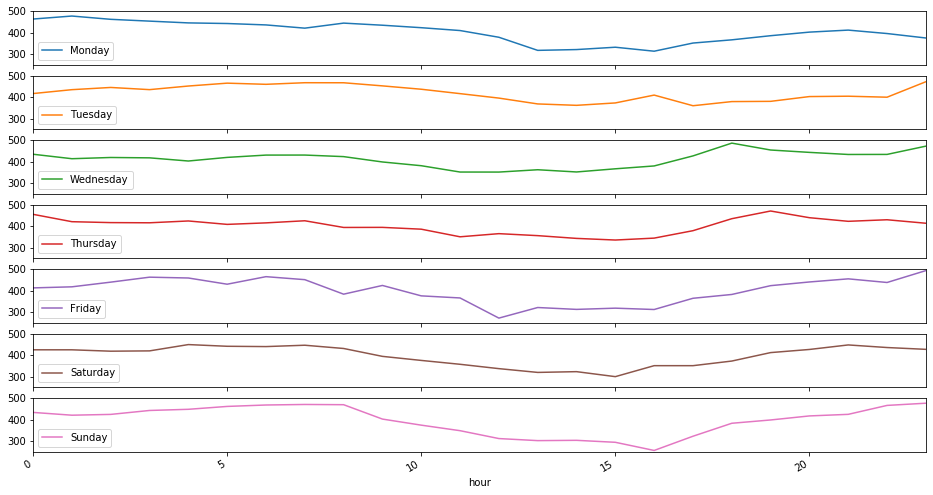

In [169]:
plt.figure(figsize=(16,9))
df_weekday_hour.plot(subplots=True, legend=True, figsize=(16,9), ylim=(250,500))
plt.xlabel("hour")
plt.show()

<Figure size 1152x648 with 0 Axes>

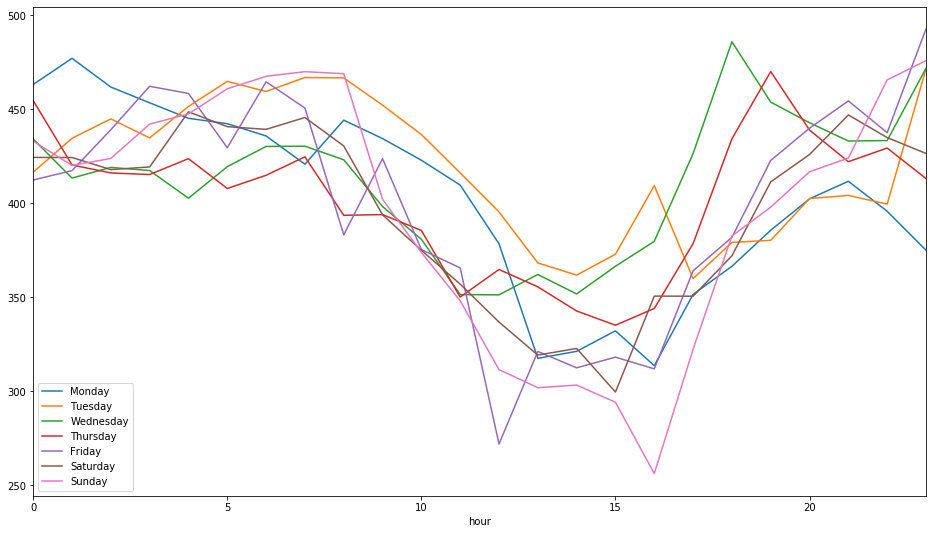

In [170]:
plt.figure(figsize=(16,9))
df_weekday_hour.plot(legend=True, figsize=(16,9))
plt.xlabel("hour")
plt.show()

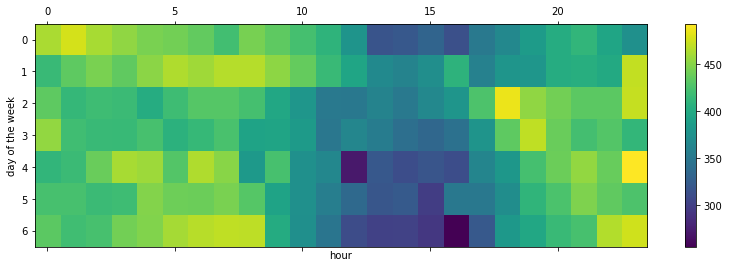

In [195]:
df_weekday_hour_T=df_weekday_hour.T
plt.matshow(df_weekday_hour_T, interpolation=None, aspect='auto')
plt.xlabel("hour")
plt.ylabel("day of the week")
plt.colorbar()
plt.show()

In [175]:
df_weekday_hour_T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,463.203333,477.137778,461.857273,453.470000,445.206364,442.348182,435.805833,420.768000,444.212727,434.425000,...,321.158000,332.056667,313.544286,351.473333,366.432222,385.631000,402.338000,411.697000,395.722222,374.990000
Tuesday,416.502727,434.574000,444.878000,434.750909,451.520000,464.881111,459.482500,466.916364,466.725455,452.225455,...,361.737273,372.854167,409.380000,359.867273,379.137500,380.263636,402.501818,404.145000,399.532222,471.568889
Wednesday,434.150909,413.390000,419.063636,417.408182,402.671818,419.477692,430.231667,430.369231,423.122500,398.221667,...,351.720000,366.430000,379.717692,426.421250,485.935000,453.837500,442.837692,433.122500,433.367273,471.837273
Thursday,454.636364,420.363333,416.119091,415.274545,423.745833,407.854167,414.874615,424.695000,393.576000,393.953636,...,342.645833,335.059167,343.960000,378.513636,434.295833,470.085833,438.934167,422.122000,429.383333,413.155000
Friday,412.369000,417.365455,439.143077,462.260769,458.429231,429.536364,464.633000,450.678333,383.178000,423.749000,...,312.386923,318.060000,311.829091,364.047143,381.815455,422.773333,439.957500,454.460000,437.550909,492.858889
Saturday,424.379091,424.354615,417.908333,419.329091,448.652500,440.761667,439.331538,445.637692,430.501667,393.826154,...,322.696000,299.494167,350.555000,350.510833,372.027692,411.369091,425.940909,446.993636,434.940909,426.502500
Sunday,433.080000,420.106000,423.832500,442.117273,447.548333,460.930000,467.567692,470.036154,468.956364,402.090000,...,303.203000,294.046667,256.093333,322.256923,382.576154,397.921667,416.731667,424.094167,465.647778,475.889091


# ラグplot

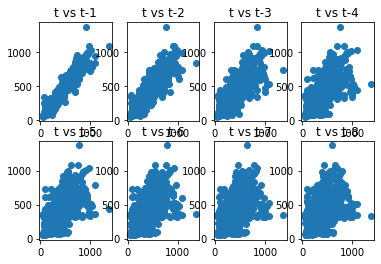

In [209]:
values = pd.DataFrame(ts.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()